<a href="https://colab.research.google.com/github/Isaac-Guz/PDI_IB_EneJun2025/blob/main/PIA_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARGAR Y MOSTRAR EN GRISES Aquí se carga la imagen médica en escala de grises, lo cual es común en procesamiento digital debido a que simplifica el análisis. Se muestra la imagen original para tener un punto de referencia antes de aplicar transformaciones.

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def load_image(image_path):
    """Cargar imagen desde archivo"""
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        raise ValueError("Error al cargar la imagen. Verifica la ruta.")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir a RGB

ECUALIZAR HISTOGRAMA Se analiza y ecualiza el histograma de la imagen. Esta técnica mejora el contraste global, permitiendo resaltar detalles que pueden estar ocultos en regiones muy oscuras o brillantes de la imagen médica.

In [9]:
def show_histograms(image):
    """Mostrar histogramas original y ecualizado (versión actualizada)"""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    eq = cv2.equalizeHist(gray)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.hist(gray.ravel(), bins=256, range=(0, 256))  # Forma correcta actual
    plt.title('Histograma Original')
    plt.xlabel('Valor de pixel')
    plt.ylabel('Frecuencia')

    plt.subplot(1, 2, 2)
    plt.hist(eq.ravel(), bins=256, range=(0, 256))  # Forma correcta actual
    plt.title('Histograma Ecualizado')
    plt.xlabel('Valor de pixel')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

OPERACIONES ARITMETICAS Y LOGICAS Se realizan operaciones entre imágenes para resaltar características importantes. Por ejemplo, al restar una versión suavizada de la imagen original, se destacan los bordes. También se aplican máscaras lógicas (AND) para enfocar zonas específicas de interés.

In [10]:
def arithmetic_operations(image):
    """Operaciones aritméticas y lógicas"""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Suavizado y detección de bordes
    smoothed = cv2.blur(gray, (5, 5))
    edges = cv2.subtract(gray, smoothed)

    # Máscara binaria y operaciones lógicas
    _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    and_result = cv2.bitwise_and(gray, mask)
    or_result = cv2.bitwise_or(gray, mask)

    # Mostrar resultados
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(gray, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(smoothed, cmap='gray')
    plt.title('Suavizada')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(edges, cmap='gray')
    plt.title('Bordes (Original - Suavizada)')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(mask, cmap='gray')
    plt.title('Máscara Binaria')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(and_result, cmap='gray')
    plt.title('AND con máscara')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(or_result, cmap='gray')
    plt.title('OR con máscara')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

FILTROS Se aplican filtros para eliminar ruido (pasa-bajo: media, gaussiano) y para detectar bordes (pasa-alto: Laplaciano, Sobel). Esto ayuda a diferenciar estructuras anatómicas o patológicas según su intensidad y contorno.

In [11]:
def apply_filters(image):
    """Aplicar diferentes filtros a la imagen"""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Filtros pasa-bajo
    mean_filter = cv2.blur(gray, (5, 5))
    gaussian_filter = cv2.GaussianBlur(gray, (5, 5), 0)

    # Filtros pasa-alto
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

    # Mostrar resultados
    titles = ['Original', 'Filtro Media', 'Filtro Gaussiano',
              'Laplaciano', 'Sobel X', 'Sobel Y']
    images = [gray, mean_filter, gaussian_filter,
              laplacian, sobelx, sobely]

    plt.figure(figsize=(15, 8))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

UMBRAL Esta sección permite separar estructuras en la imagen usando un umbral. Al ajustar este valor, se pueden distinguir regiones como huesos, tejidos o posibles lesiones. Se incluye un control deslizante para probar diferentes valores y observar los resultados en tiempo real.

In [12]:
def threshold_segmentation(image):
    """Segmentación por umbral con control deslizante"""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Configurar figura
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.subplots_adjust(bottom=0.25)

    # Umbral inicial (Otsu)
    _, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img = ax.imshow(thresh_otsu, cmap='gray')
    ax.set_title(f'Umbralización (Umbral: {_})')
    ax.axis('off')

    # Control deslizante
    ax_thresh = plt.axes([0.2, 0.1, 0.6, 0.03])
    thresh_slider = Slider(ax_thresh, 'Umbral', 0, 255, valinit=_, valstep=1)

    def update(val):
        _, thresh = cv2.threshold(gray, val, 255, cv2.THRESH_BINARY)
        img.set_data(thresh)
        ax.set_title(f'Umbralización (Umbral: {val})')
        fig.canvas.draw_idle()

    thresh_slider.on_changed(update)
    plt.show()

FOURIER Aquí se transforma la imagen al dominio de la frecuencia para analizar sus componentes en baja y alta frecuencia. Luego, se aplica un filtro que atenúa las frecuencias altas, lo cual ayuda a eliminar detalles finos o ruido sin afectar las formas generales.

In [13]:
def fourier_analysis(image):
    """Análisis de Fourier y filtrado en frecuencia"""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Transformada de Fourier
    dft = np.fft.fft2(gray)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)  # +1 para evitar log(0)

    # Filtro pasa-bajo
    rows, cols = gray.shape
    crow, ccol = rows//2, cols//2
    mask = np.zeros((rows, cols), np.uint8)
    r = 30
    mask[crow-r:crow+r, ccol-r:ccol+r] = 1

    # Aplicar filtro y transformada inversa
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Mostrar resultados
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(gray, cmap='gray')
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Espectro de Fourier')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_back, cmap='gray')
    plt.title('Imagen Filtrada')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

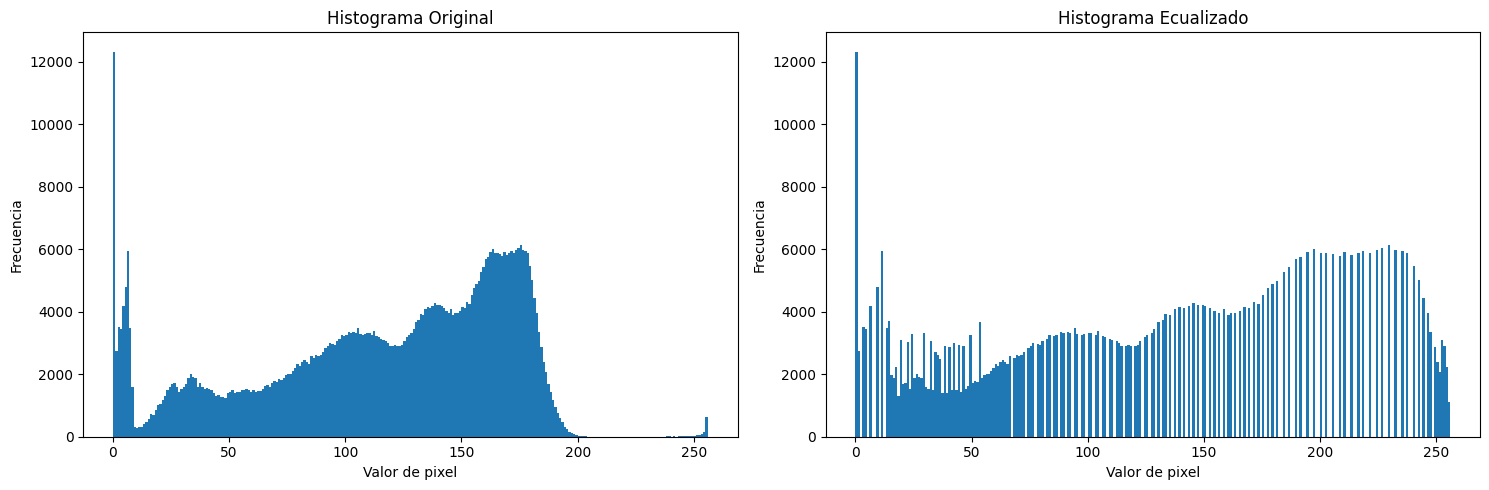

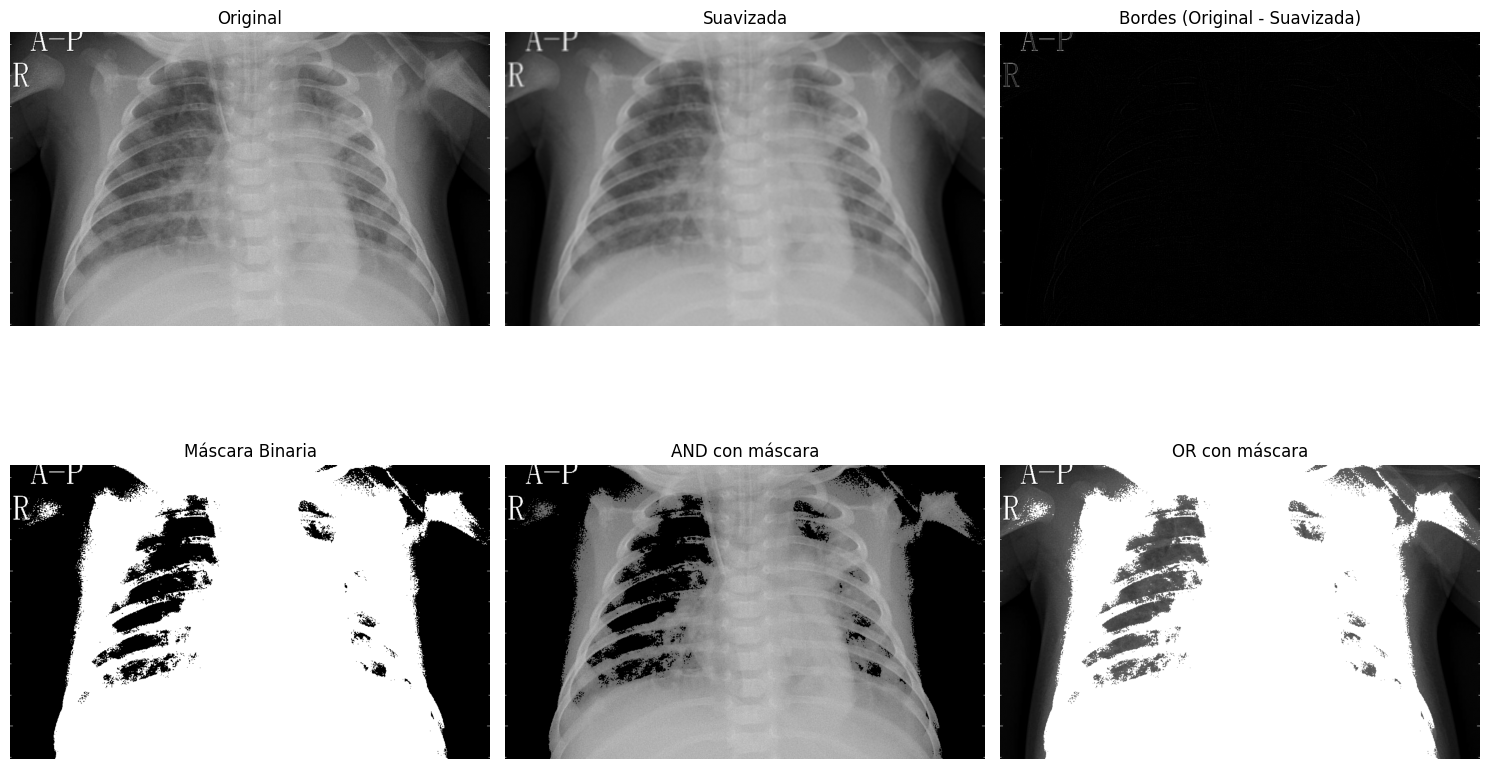

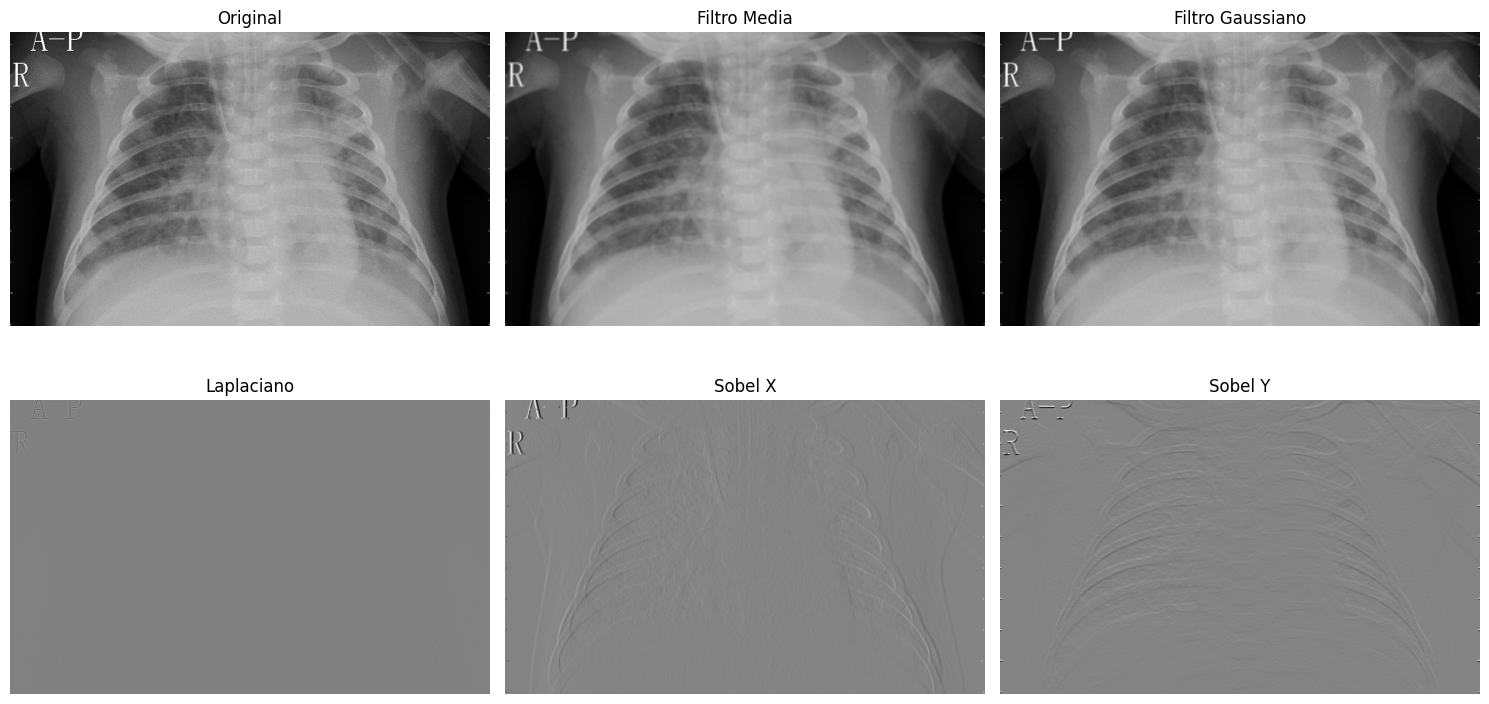

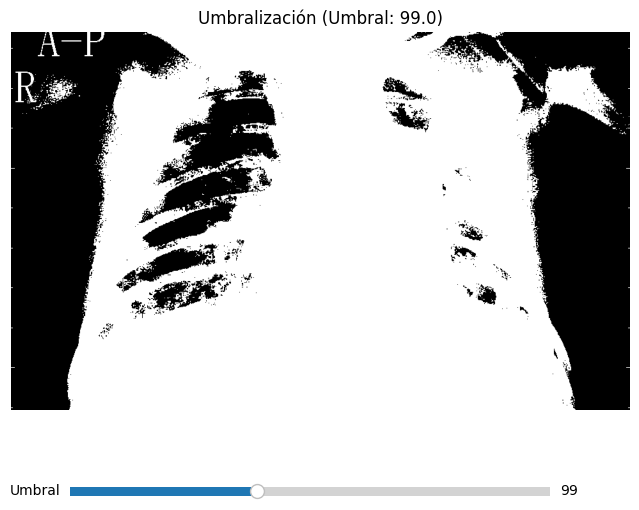

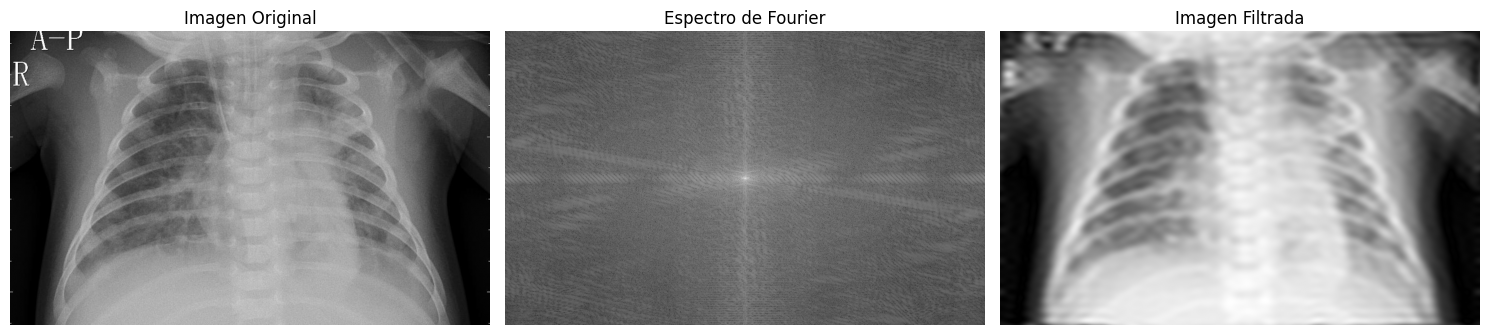

In [14]:
# Ejemplo de uso:
if __name__ == "__main__":
    # Cargar imagen (reemplaza con tu ruta)
    img_path = "/content/RadiografiaCostillas.jpeg"
    try:
        image = load_image(img_path)

        # Ejecutar las funciones que necesites:
        show_histograms(image)        # 1. Análisis de histogramas
        arithmetic_operations(image)  # 2. Operaciones aritméticas
        apply_filters(image)          # 3. Aplicación de filtros
        threshold_segmentation(image) # 4. Segmentación por umbral
        fourier_analysis(image)       # 5. Análisis de Fourier

    except Exception as e:
        print(f"Error: {e}")